In [39]:
import numpy as np
import pandas as pd

red = pd.read_csv("winequality-red.csv")

red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [40]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [41]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

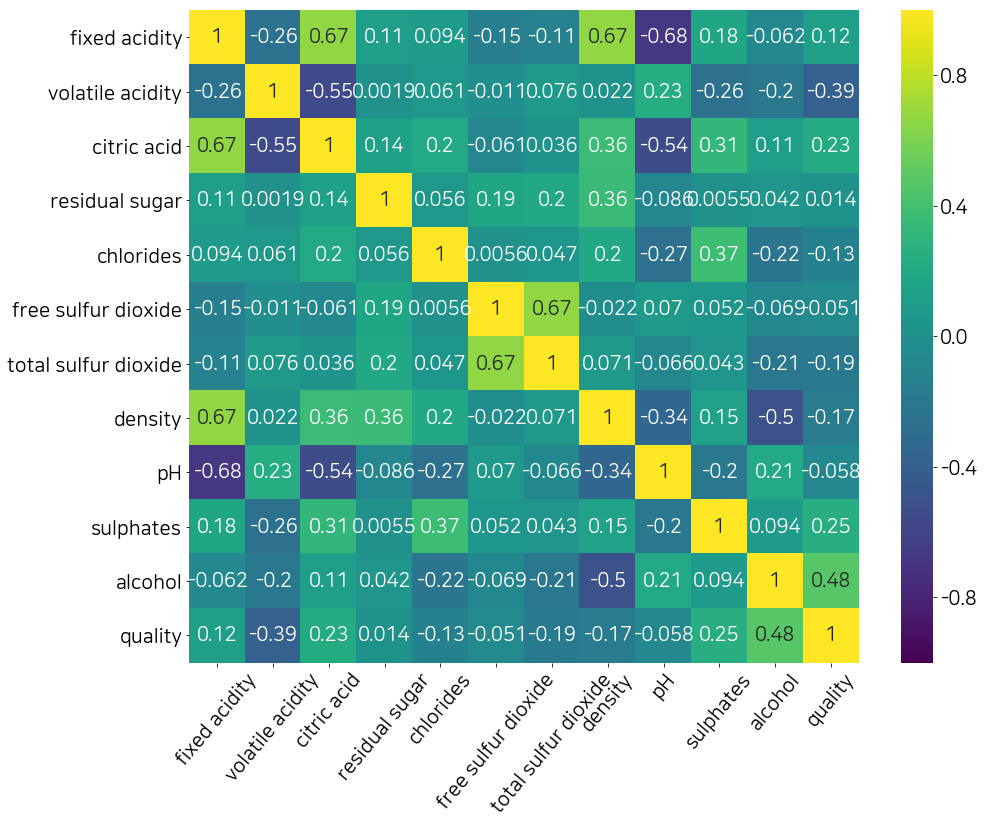

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

corr = red.corr()

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap="viridis", annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
plt.show()

In [43]:
corr.transpose().loc[:, ["quality"]].sort_values(by="quality",ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


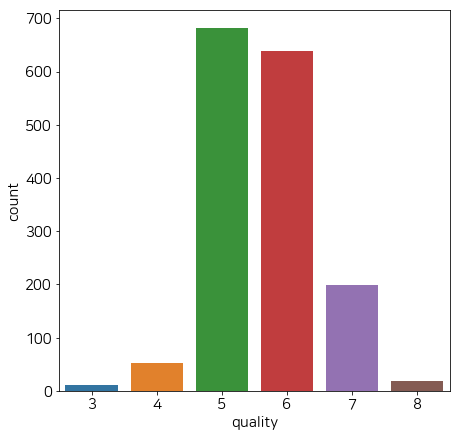

In [44]:
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams["font.size"] = 15
sns.countplot(x='quality', data=red)

In [45]:
X = red.drop(['quality'], axis=1)
y = red['quality']

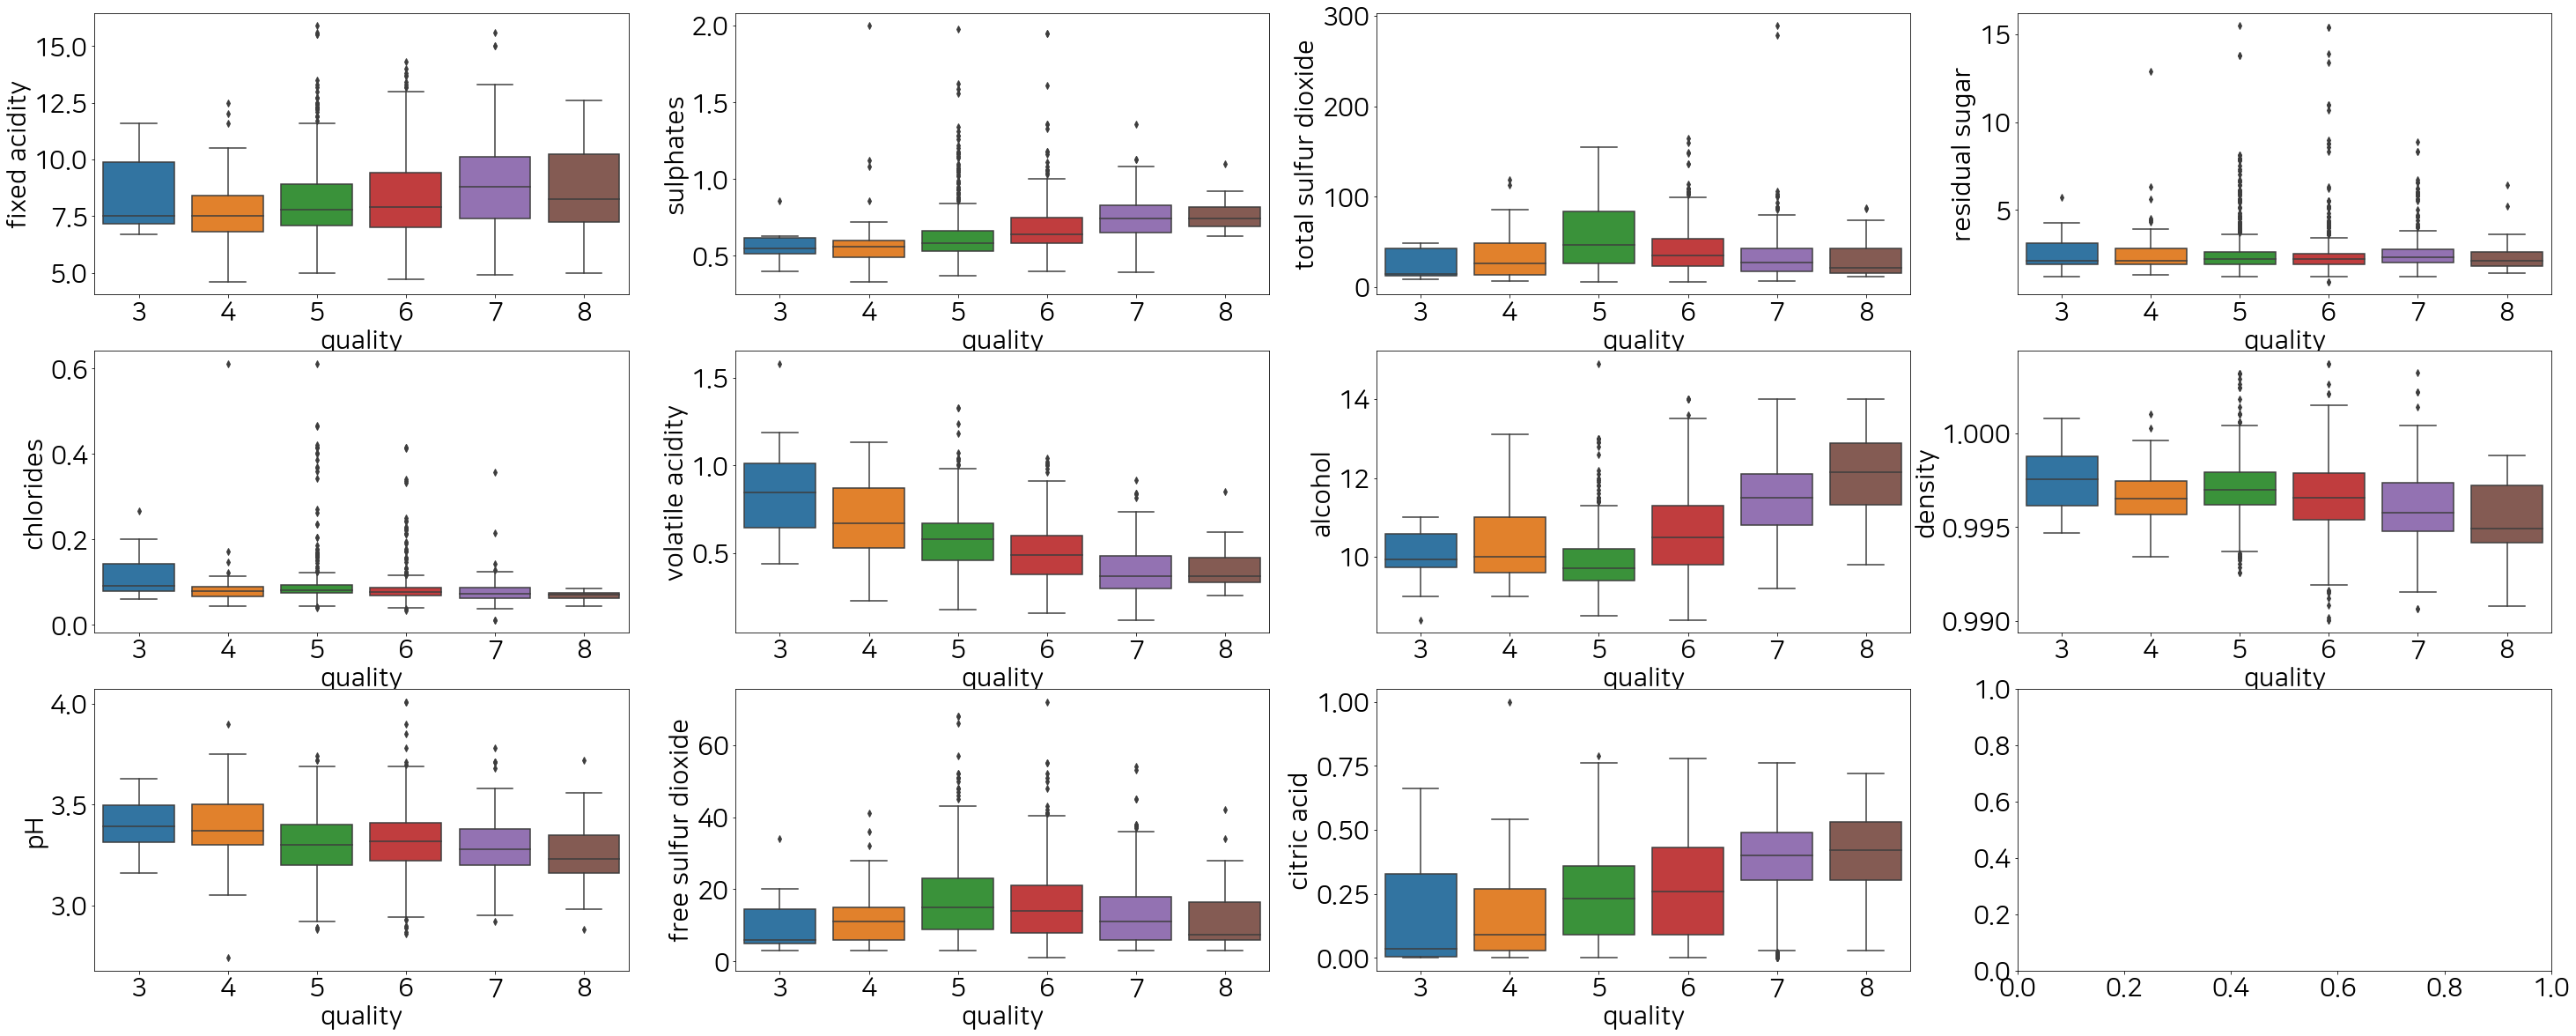

In [48]:
plt.rcParams["figure.figsize"] = (50, 20)
plt.rcParams["font.size"] = 30

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=4, nrows=3)
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 3
    ax_y = idx % 4
    sns.boxplot(x='quality', y=col, data=red, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

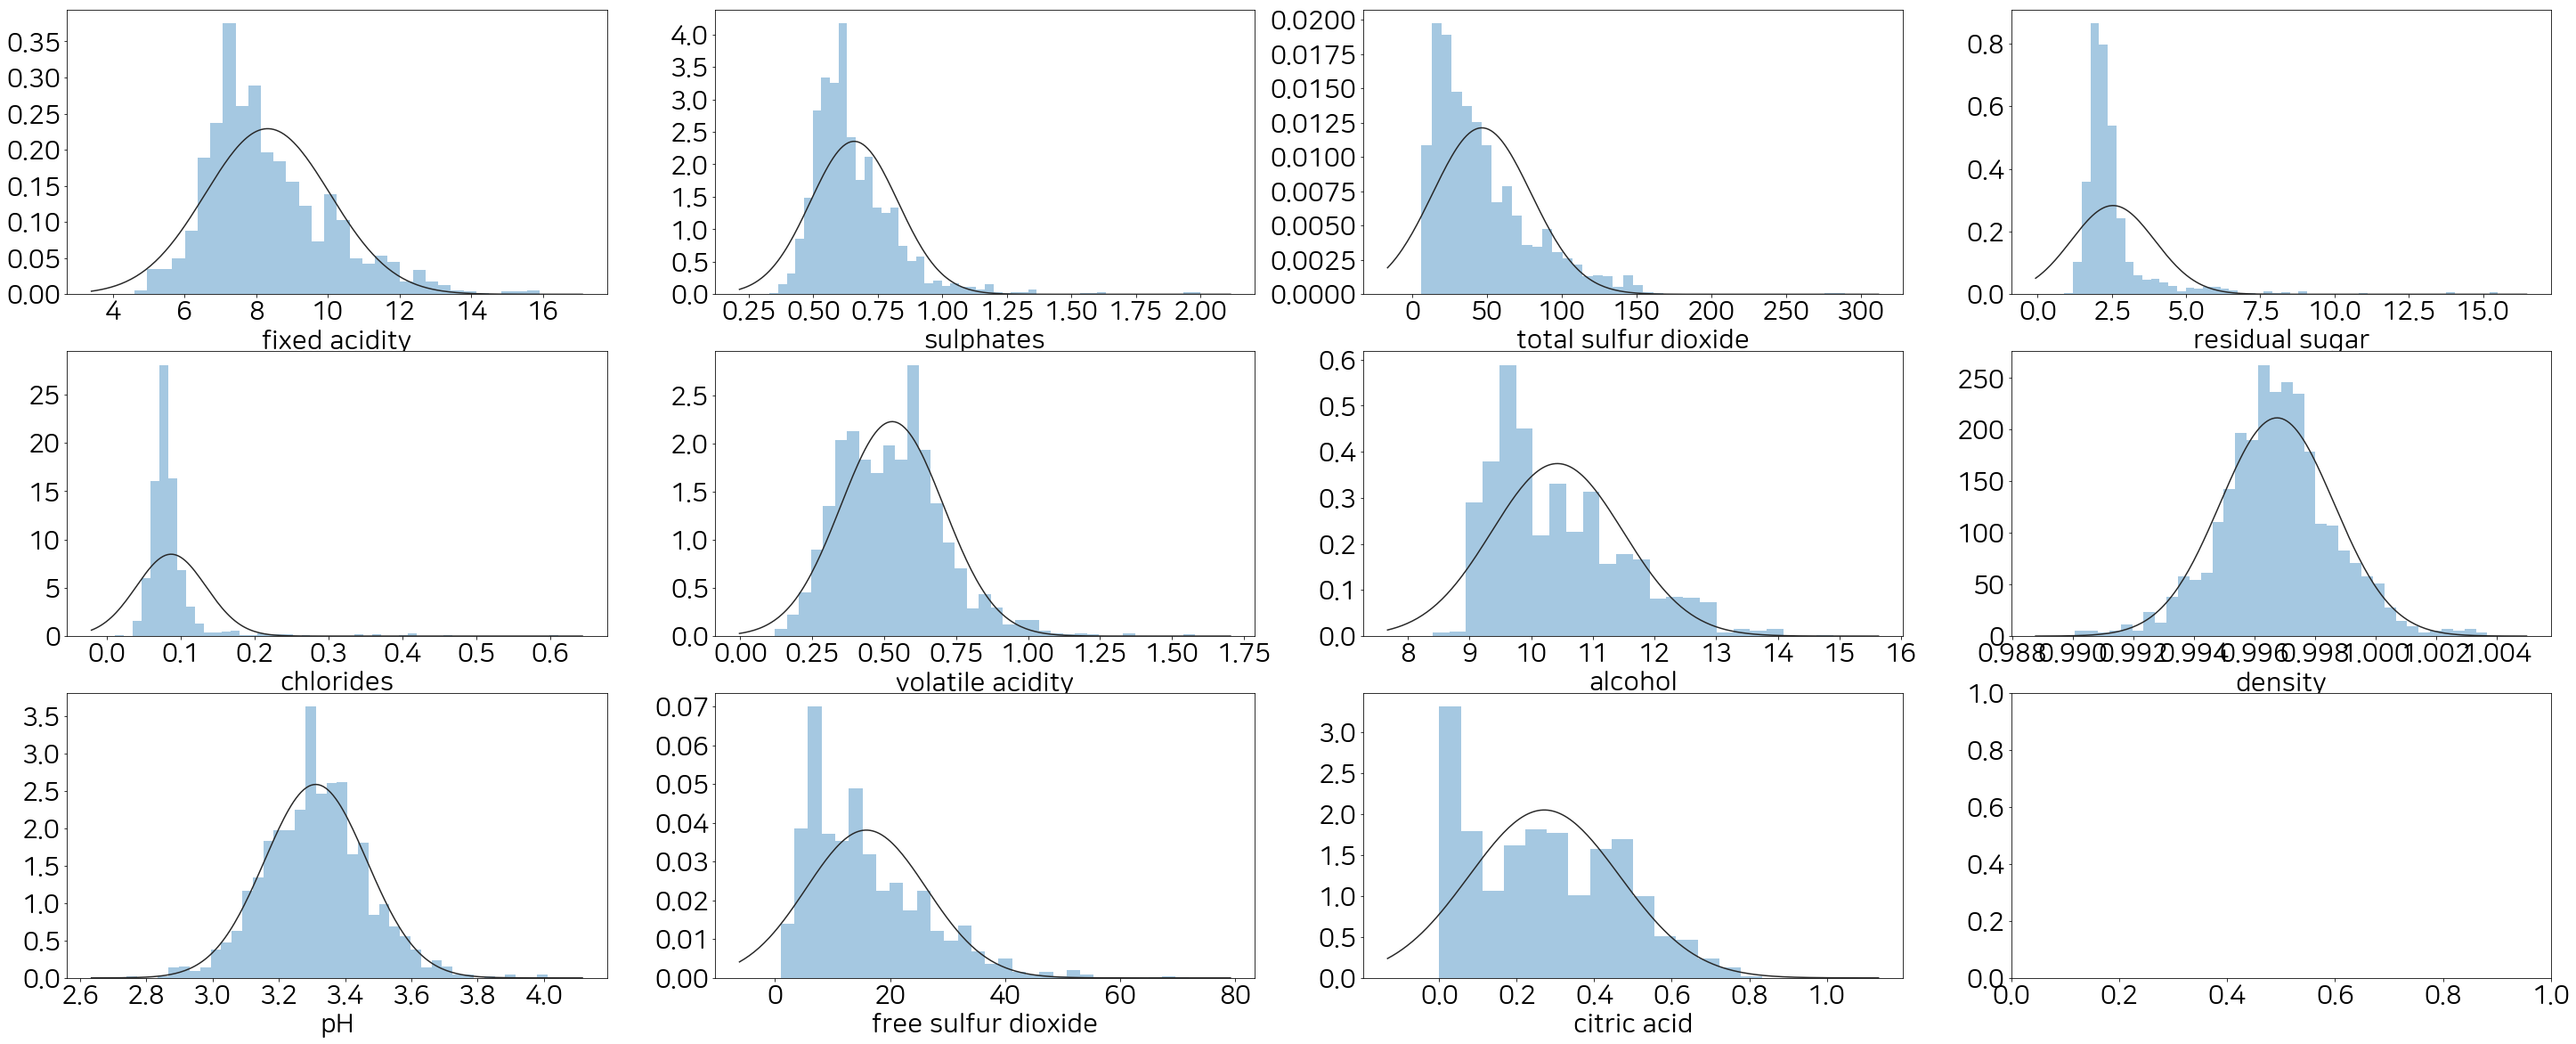

In [9]:
import scipy as sp

plt.rcParams["figure.figsize"] = (50, 20)
plt.rcParams["font.size"] = 30

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=4, nrows=3)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 3
    ax_y = idx % 4
    data = red[col].values
    sns.distplot(data, kde=False, rug=False, fit=sp.stats.norm, ax=ax[ax_x][ax_y], axlabel=col)
    ax_x += 1

plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
Xscaled = scaler.transform(X)

df_scaled = pd.DataFrame(data=Xscaled, columns=X.columns.to_list())
df_scaled[y.name] = y.values
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


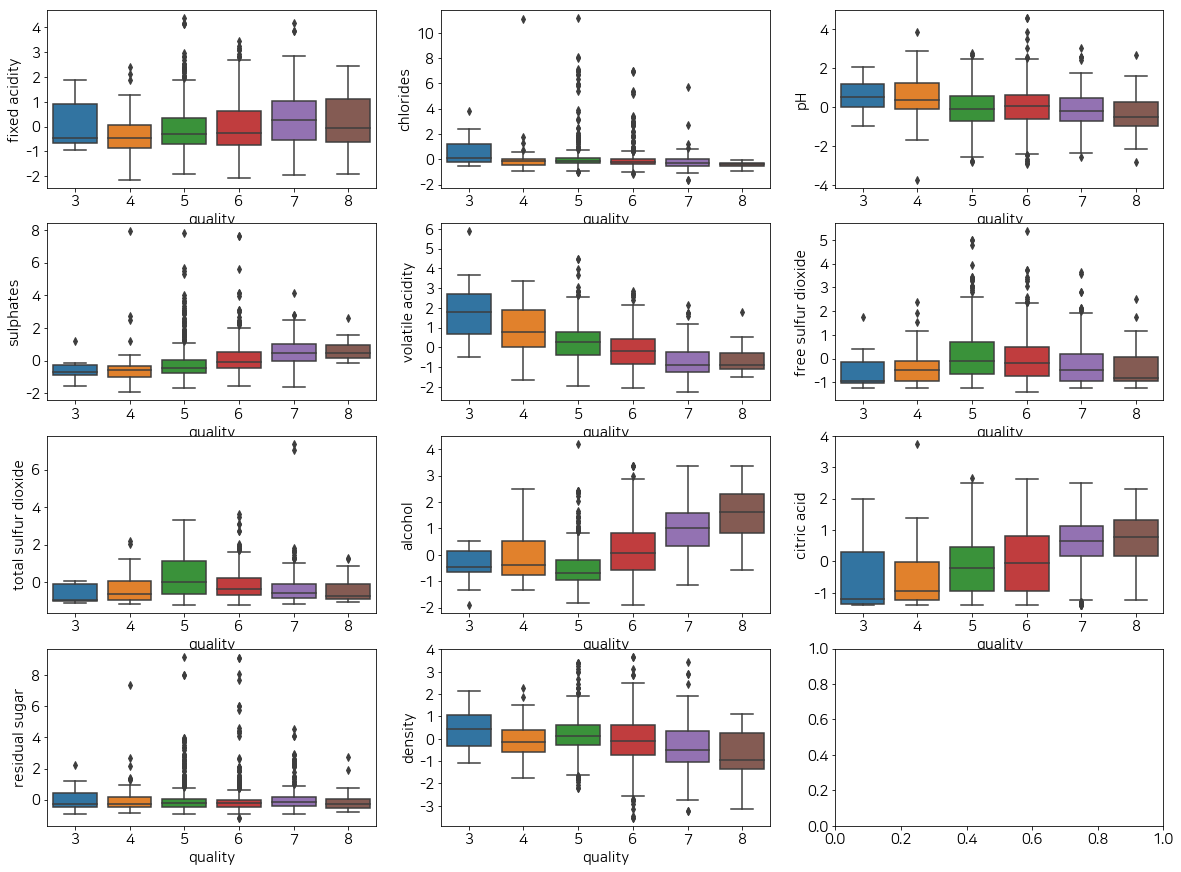

In [11]:
# StandardScaler
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["font.size"] = 15

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    sns.boxplot(x='quality', y=col, data=df_scaled, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

In [12]:
from sklearn.preprocessing import RobustScaler

X = red.drop(['quality'], axis=1)
y = red['quality']

scaler = RobustScaler().fit(X)
Xscaled = scaler.transform(X)

df_scaled = pd.DataFrame(data=Xscaled, columns=X.columns.to_list())
df_scaled[y.name] = y.values
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50,5
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25,5
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25,5
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25,6
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50,5


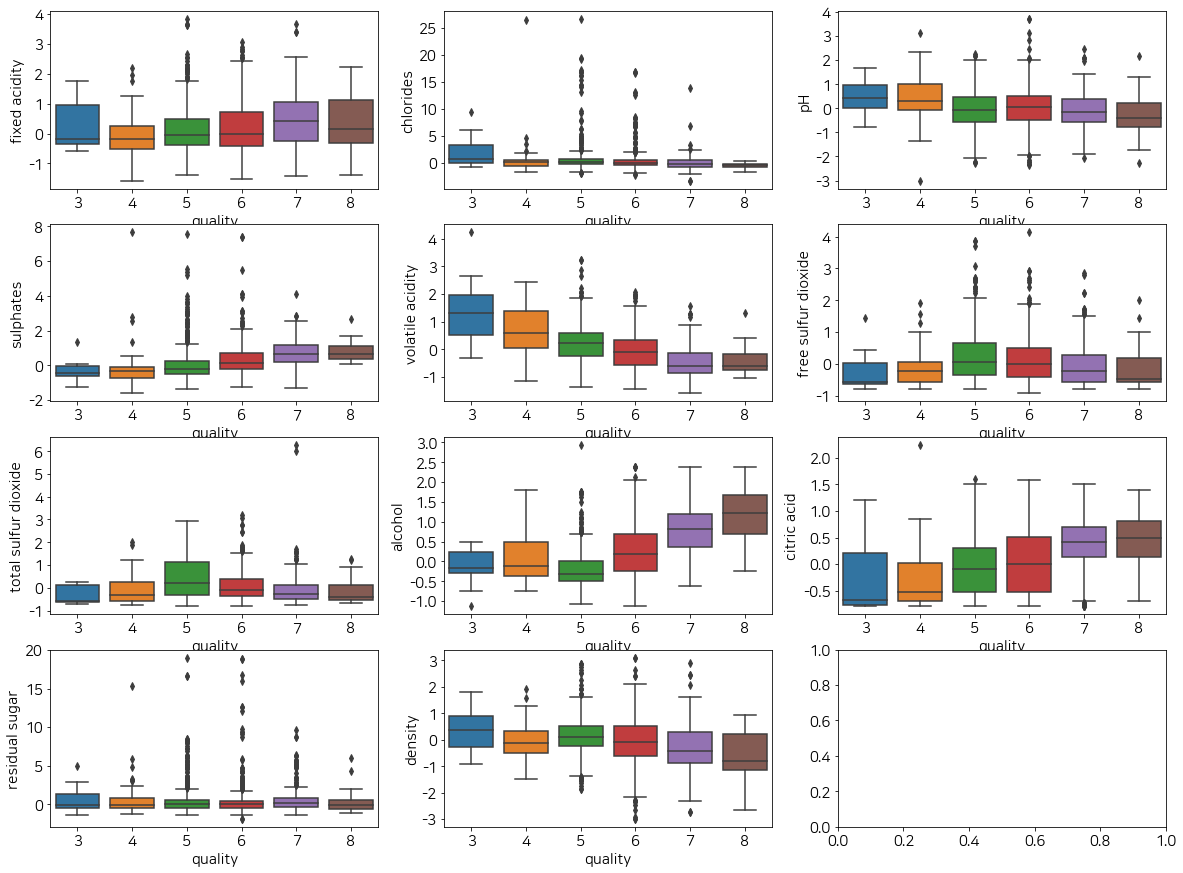

In [13]:
#RobustScaler
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["font.size"] = 15

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    sns.boxplot(x='quality', y=col, data=df_scaled, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

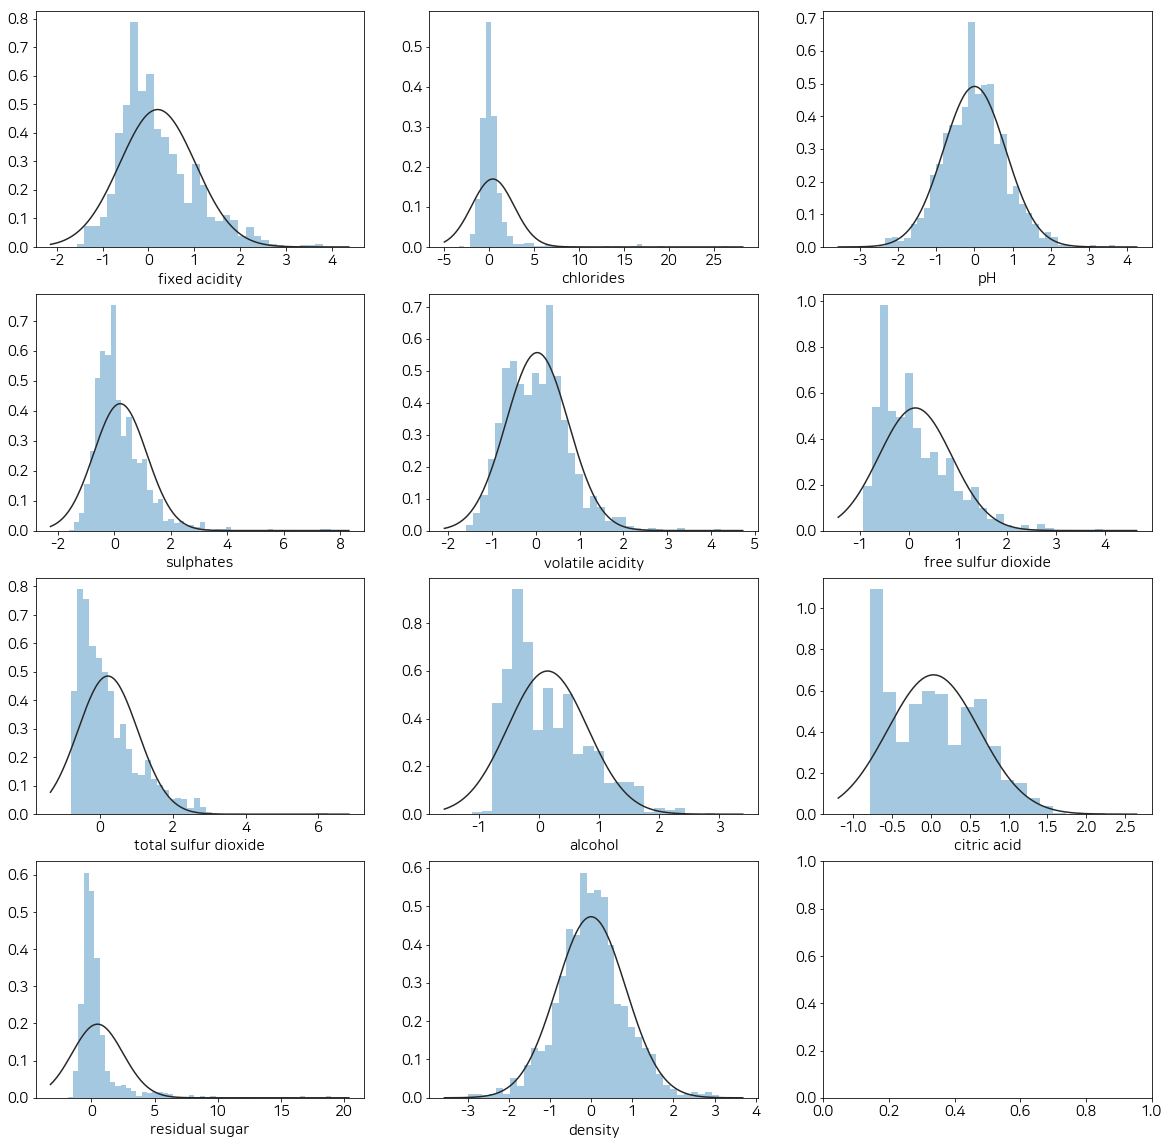

In [14]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 15

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    data = df_scaled[col].values
    sns.distplot(data, kde=False, rug=False, fit=sp.stats.norm, ax=ax[ax_x][ax_y], axlabel=col)
    ax_x += 1

plt.show()

## 이상치 제거!!!!

In [15]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
tmp = red.copy()
cols = X.columns.to_list()
#cols = ['chlorides', 'residual sugar', 'sulphates', 'total sulfur dioxide']
for col in cols:
    outlier_idx = get_outlier(df=tmp, column=col, weight=1.5)
    tmp = tmp.drop(outlier_idx, axis=0)
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1135 non-null float64
volatile acidity        1135 non-null float64
citric acid             1135 non-null float64
residual sugar          1135 non-null float64
chlorides               1135 non-null float64
free sulfur dioxide     1135 non-null float64
total sulfur dioxide    1135 non-null float64
density                 1135 non-null float64
pH                      1135 non-null float64
sulphates               1135 non-null float64
alcohol                 1135 non-null float64
quality                 1135 non-null int64
dtypes: float64(11), int64(1)
memory usage: 115.3 KB


In [16]:
tmp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,8.146784,0.522211,0.246000,2.180617,0.078296,14.788546,40.946256,0.996569,3.325286,0.628405,10.353377,5.637004
std,1.444025,0.164683,0.180343,0.439189,0.013741,8.587718,24.625658,0.001558,0.130173,0.112067,0.953617,0.758518
min,5.100000,0.120000,0.000000,1.200000,0.042000,1.000000,6.000000,0.992560,2.980000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995515,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.400000,0.087000,20.000000,54.000000,0.997500,3.400000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.116000,40.000000,113.000000,1.000400,3.680000,0.940000,13.000000,8.000000


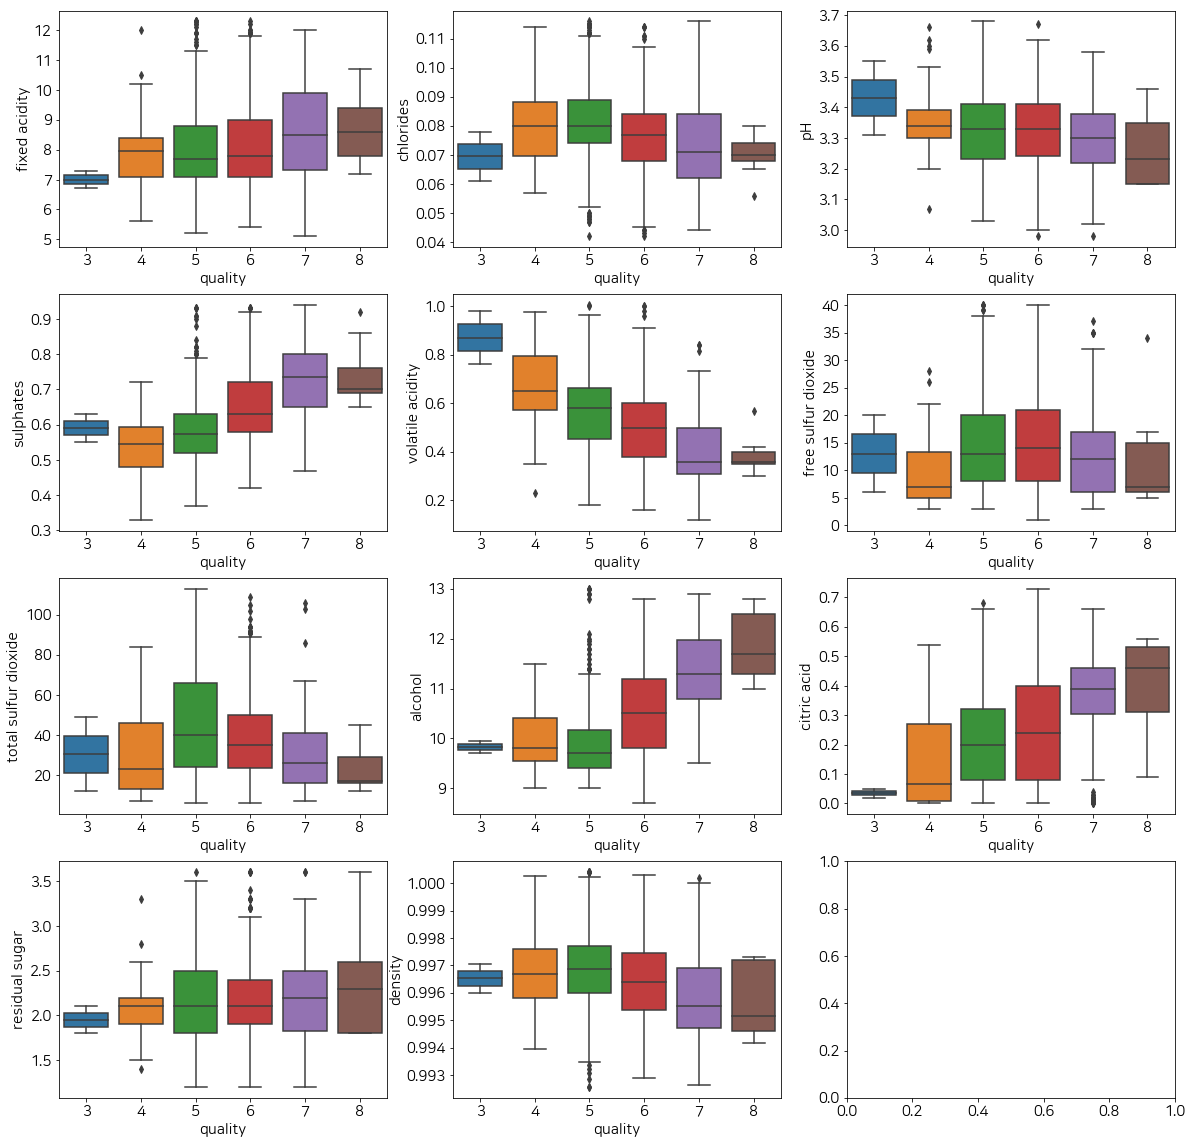

In [17]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 15

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    sns.boxplot(x='quality', y=col, data=tmp, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

In [18]:
X = tmp.drop(['quality'], axis=1)
y = tmp['quality']

scaler = StandardScaler().fit(X)
Xscaled = scaler.transform(X)

df_scaled = pd.DataFrame(data=Xscaled, columns=X.columns.to_list())
df_scaled[y.name] = y.values
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.517383,1.080055,-1.364671,-0.639225,-0.167169,-0.441353,-0.282198,0.790246,1.419610,-0.610668,-1.000189,5
1,-0.240257,2.173545,-1.364671,0.955325,1.434599,1.189601,1.058458,0.148087,-0.962884,0.460596,-0.580549,5
2,-0.240257,1.444552,-1.142773,0.271947,0.997753,0.024634,0.530321,0.276519,-0.501756,0.192780,-0.580549,5
3,2.115311,-1.471421,1.741897,-0.639225,-0.239977,0.257627,0.774077,0.918678,-1.270302,-0.432124,-0.580549,6
4,-0.517383,1.080055,-1.364671,-0.639225,-0.167169,-0.441353,-0.282198,0.790246,1.419610,-0.610668,-1.000189,5


In [19]:
df_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.135000e+03,1.135000e+03,1.135000e+03,1.135000e+03,1.135000e+03,1.135000e+03,1.135000e+03,1.135000e+03,1.135000e+03,1.135000e+03,1.135000e+03,1135.000000
mean,-3.795300e-16,1.760706e-17,-4.573923e-16,5.008231e-16,5.469927e-16,1.568496e-16,2.080690e-16,1.334664e-14,2.967279e-16,-2.107467e-16,6.676011e-16,5.637004
std,1.000441e+00,1.000441e+00,1.000441e+00,1.000441e+00,1.000441e+00,1.000441e+00,1.000441e+00,1.000441e+00,1.000441e+00,1.000441e+00,1.000441e+00,0.758518
min,-2.110855e+00,-2.443412e+00,-1.364671e+00,-2.233775e+00,-2.642628e+00,-1.606320e+00,-1.419725e+00,-2.574668e+00,-2.653685e+00,-2.663924e+00,-1.734560e+00,3.000000
25%,-7.252268e-01,-8.031770e-01,-9.208755e-01,-6.392251e-01,-6.768223e-01,-7.908433e-01,-7.697097e-01,-6.770876e-01,-7.323197e-01,-6.999397e-01,-8.952790e-01,5.000000
50%,-2.402569e-01,-1.343445e-02,-3.328466e-02,-1.836392e-01,-2.155362e-02,-2.083597e-01,-2.415723e-01,1.965516e-02,3.622663e-02,-1.643077e-01,-2.658185e-01,6.000000
75%,5.911200e-01,6.548092e-01,7.988317e-01,4.997395e-01,6.337150e-01,6.071172e-01,5.303208e-01,5.975985e-01,5.742090e-01,6.391404e-01,6.783724e-01,6.000000
max,2.877407e+00,2.932913e+00,2.684962e+00,3.233255e+00,2.745136e+00,2.937051e+00,2.927252e+00,2.459860e+00,2.726139e+00,2.781668e+00,2.776574e+00,8.000000


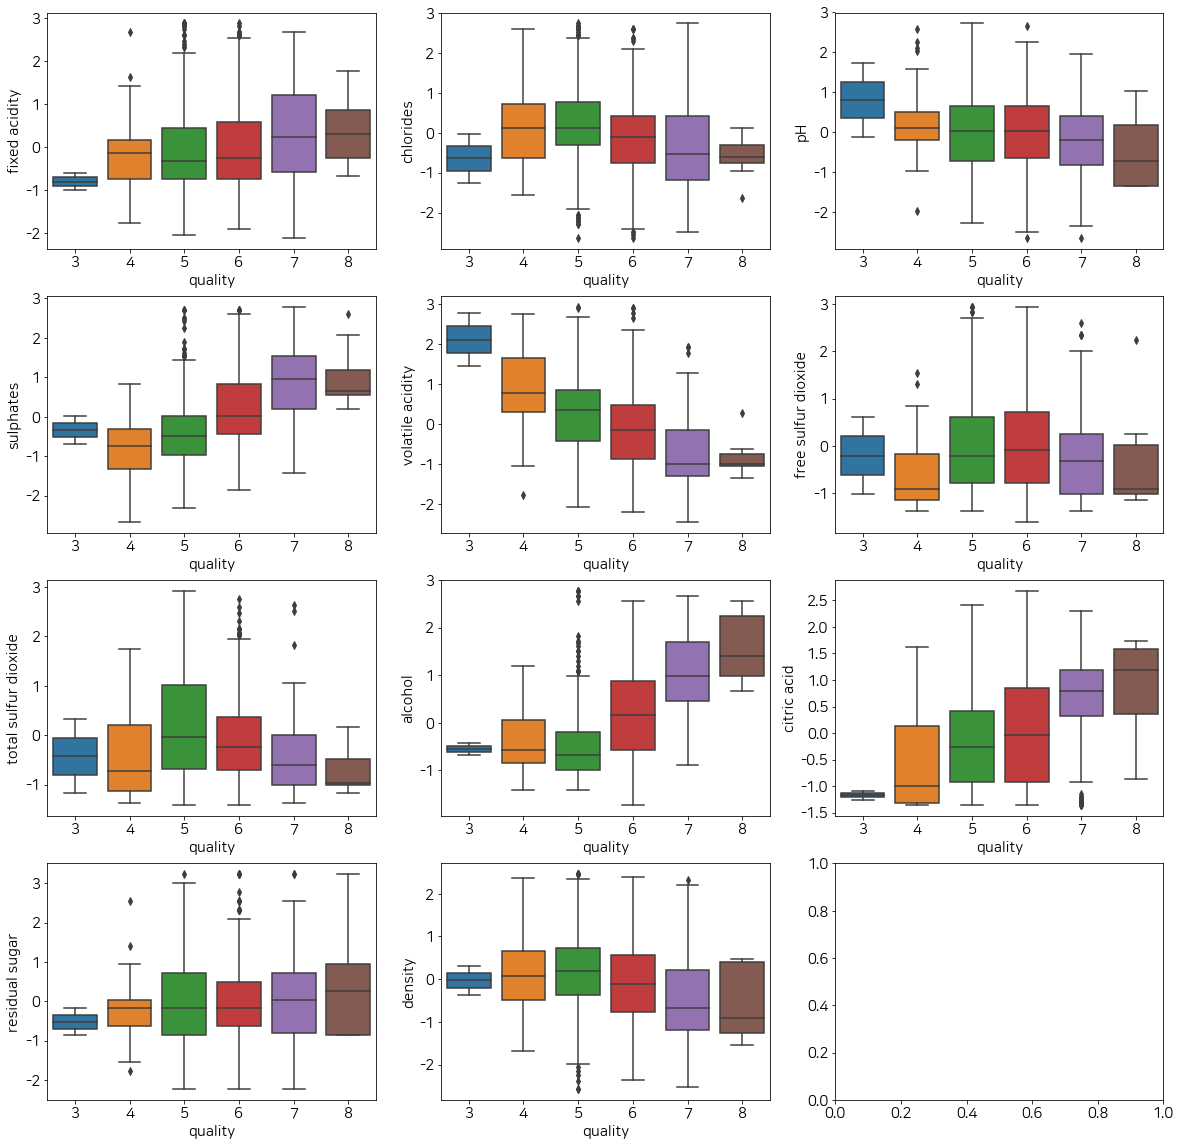

In [20]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 15


length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    sns.boxplot(x='quality', y=col, data=df_scaled, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

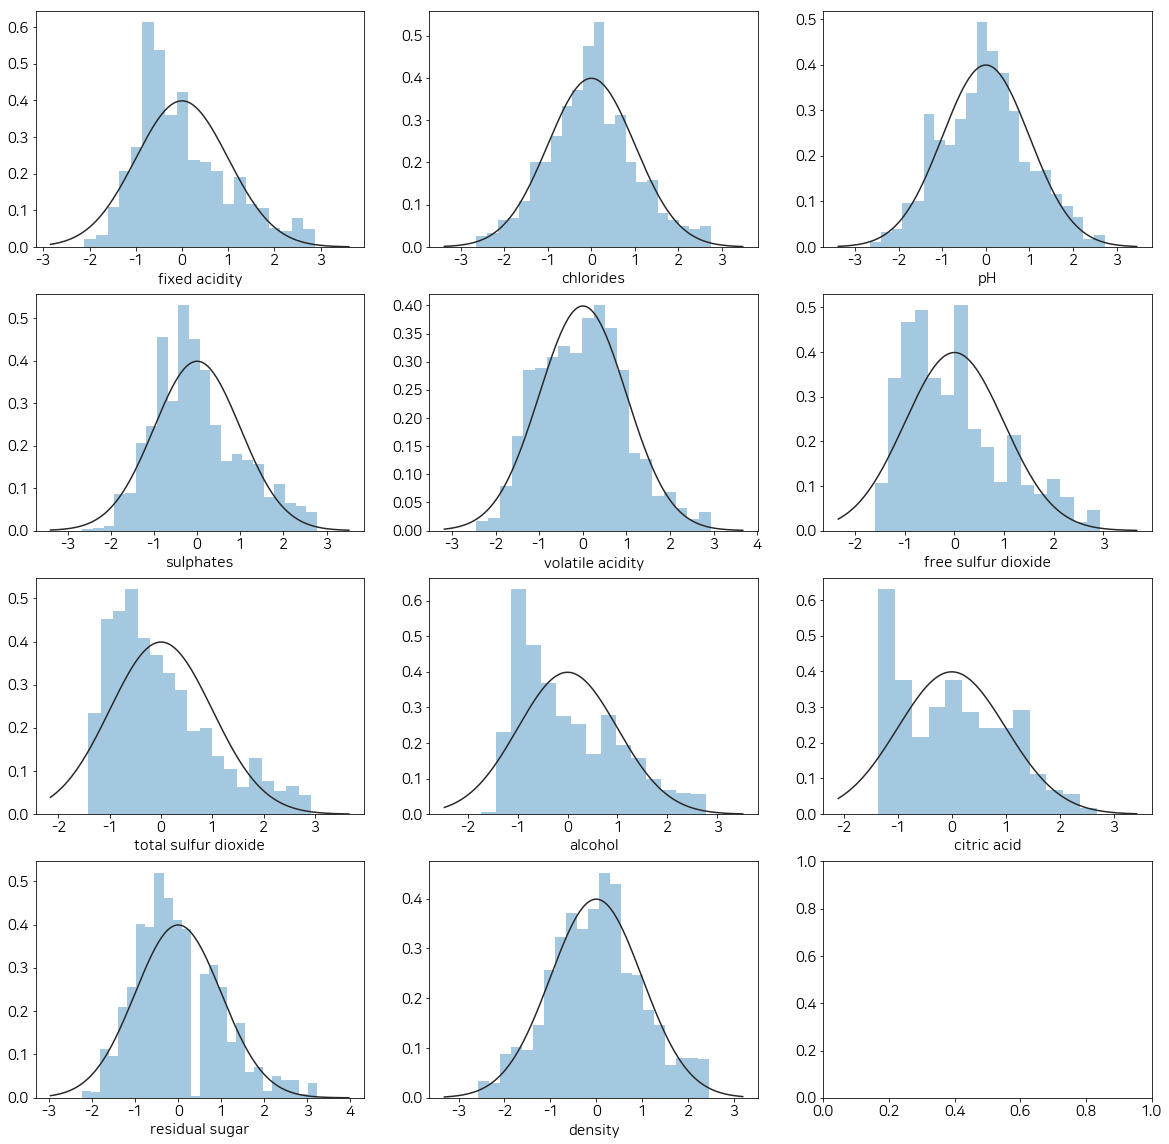

In [21]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 15

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    data = df_scaled[col].values
    sns.distplot(data, kde=False, rug=False, fit=sp.stats.norm, ax=ax[ax_x][ax_y], axlabel=col)
    ax_x += 1

plt.show()

In [22]:
tmp.to_csv('data/drop_outlier.csv', index=False)
df_scaled.to_csv('data/drop_outlier_scaled.csv', index=False)

In [23]:
def fc(data):
    if data > 5:
        # 좋은거
        return 1
    # 나쁜거
    return 0
binary = tmp.copy()
binary['quality'] = binary['quality'].apply(fc)

In [24]:
binary.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [25]:
binary.to_csv('data/ot_binary_class.csv', index=False)

In [26]:
X = binary.drop(['quality'], axis=1)
y = binary['quality']

scaler = StandardScaler().fit(X)
Xscaled = scaler.transform(X)

df_scaled = pd.DataFrame(data=Xscaled, columns=X.columns.to_list())
df_scaled[y.name] = y.values
df_scaled.to_csv('data/ot_binary_class_scaled.csv', index=False)

In [27]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.517383,1.080055,-1.364671,-0.639225,-0.167169,-0.441353,-0.282198,0.790246,1.419610,-0.610668,-1.000189,0
1,-0.240257,2.173545,-1.364671,0.955325,1.434599,1.189601,1.058458,0.148087,-0.962884,0.460596,-0.580549,0
2,-0.240257,1.444552,-1.142773,0.271947,0.997753,0.024634,0.530321,0.276519,-0.501756,0.192780,-0.580549,0
3,2.115311,-1.471421,1.741897,-0.639225,-0.239977,0.257627,0.774077,0.918678,-1.270302,-0.432124,-0.580549,1
4,-0.517383,1.080055,-1.364671,-0.639225,-0.167169,-0.441353,-0.282198,0.790246,1.419610,-0.610668,-1.000189,0


In [28]:
red = pd.read_csv("winequality-red.csv")

X = red.drop(['quality'], axis=1)
y = red['quality']

scaler = StandardScaler().fit(X)
Xscaled = scaler.transform(X)

df_scaled = pd.DataFrame(data=Xscaled, columns=X.columns.to_list())
df_scaled[y.name] = y.values


df_scaled['quality'] = df_scaled['quality'].apply(fc)

In [29]:
df_scaled.to_csv('data/binary_scaled.csv', index=False)

In [30]:
red['quality'] = red['quality'].apply(fc)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [31]:
red.to_csv('data/birnary.csv', index=False)